# My direct mia

In [0]:
# google colab pleaaase gimme more memory

#a = []
#while(1):
#    a.append('1')

## Imports, Download Models and Mounting Google Drive

In [0]:
# automatically reload my imports (%aimport) every time they are used
# cool feature for development
%load_ext autoreload
%autoreload 1

import os
import sys
# check if Notebook is loaded in google colab
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
  # Install TensorFlow on Google Colab
  try:
    #%tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
  except Exception:
    pass

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
from tensorflow.keras import models
from tensorflow.keras.models import Model

TensorFlow 2.x selected.


In [0]:
# mount google drive on google colab

# catch the output of the cell
#%%capture

# mount google drive
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

# navigate to project folder
#%cd ~
#%cd ..
#%cd content/drive/My\ Drive/nn_direct_mia
#%ls

In [0]:
# if using colab download needed scripts from github
if IN_COLAB:
  !wget https://raw.githubusercontent.com/hallojs/nn_direct_mia/master/model_utils.py --output-document=model_utils.py
  !wget https://raw.githubusercontent.com/hallojs/nn_direct_mia/master/data.py --output-document=data.py

# my imports
%aimport model_utils
%aimport data
mu = model_utils

In [0]:
# load pre-trained models for mnist dataset
!pip install gdown

#if not os.path.isdir('storage'):
    !gdown --id 10ky_fbzxxlMi4JjSvjsdiaglxmoWBgg0
    !unzip storage.zip

## Load and Preprocess Datasets

In [0]:
# details of the datasets

# n_trgt_knwldg: size of kownledge of the target
# n_bckgrnd_knwldg: size of the background knowledge of the attacker
# n_training_set: size of training set of target and refernce models
# n_target_models: even number of target models
# n_reference_models: even number of reference models
# n_categories: number of categories for the prediction
# input_shape: sample dimensions
# dataset_path: path to the trained models etc.

# for mnist
dataset_details_mnist = {
    'n_trgt_knwldg': 20000,
    'n_bckgrnd_knwldg': 40000,
    'n_training_set': 10000,
    'n_target_models': 100,
    'n_reference_models': 100,
    'n_categories': 10,
    'input_shape': (28, 28, 1),
    'dataset_path': 'storage/mnist_old/'
}

# for fashion_mnist
dataset_details_fashion_mnist = {
    'n_trgt_knwldg': 20000,
    'n_bckgrnd_knwldg': 40000,
    'n_training_set': 10000,
    'n_target_models': 100,
    'n_reference_models': 100,
    'n_categories': 10,
    'input_shape': (28, 28, 1),
    'dataset_path': 'storage/fashion_mnist/'
}

# for cifar10
dataset_details_cifar10 = {
    'n_trgt_knwldg': 20000,
    'n_bckgrnd_knwldg': 30000,
    'n_training_set': 10000,
    'n_target_models': 100,
    'n_reference_models': 100,
    'n_categories': 10,
    'input_shape': (32, 32, 3),
    'dataset_path': 'storage/cifar10/'
}

# load mnist dataset
# 60000 training samples <- we use this samples for our training
# 10000 test samples
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
mnist_data = data.Data(train_images, train_labels, test_images, test_labels, dataset_details_mnist)

# load fashion mnist dataset
# 60000 training samples <- we use this samples for our training
# 10000 test samples
#(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()
#fashion_mnist_data = data.Data(train_images, train_labels, test_images, test_labels, dataset_details_fashion_mnist)

# load cifar 10 dataset
# 50000 training examples <- we use this samples for our training
# 10000 test examples
#(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
#cifar_data = data.Data(train_images, train_labels, test_images, test_labels, dataset_details_cifar10)

# choose the dataset for this run
used_data = mnist_data

# create directory structure
mu.create_dir_structure(used_data.dataset_path)

#records_per_target_model = mu.get_records_per_target_model(used_data)
#records_per_reference_model = mu.get_records_per_reference_model(used_data)

11493376/11490434 [==============================] - 0s 0us/step


## Train Models

In [0]:
n_epochs = 50
n_batches = 50

### Train Target Models

In [0]:
%%capture
# train models and/or...
#mu.train_target_models(used_data, records_per_target_model, n_epochs, n_batches)

# ...load models
path = used_data.dataset_path + 'target_models/'
target_models = mu.load_models(path , used_data.n_target_models)
print(target_models.shape)

In [0]:
# evaluate target_models
mu.evaluate_models(target_models, used_data, n_batches)

mean_acc:  0.98608893  - min_acc:  0.9817


(0.98608893, 0.9817)

### Train Reference Models

In [0]:
%%capture
#mu.train_reference_models(used_data, records_per_reference_model, n_epochs, n_batches)
path = used_data.dataset_path + 'reference_models/'
reference_models = mu.load_models(path, used_data.n_reference_models)
print(reference_models.shape)

In [0]:
# evaluate reference_models
mu.evaluate_models(reference_models, used_data, n_batches)

mean_acc:  0.9857199  - min_acc:  0.9796


(0.9857199, 0.9796)

## Select Target Records

### Get High-Level-Features

In [0]:
# generate intermediate models from reference models
intermediate_models = mu.gen_intermediate_models(reference_models)

# use intermediate models to generate high_level_features
# --- high level features of the target models
high_level_features_target = mu.gen_high_level_features(used_data, intermediate_models, used_data.target_train_images, 'target.npy')
high_level_features_target = np.load(used_data.dataset_path + 'high_level_features/target.npy')

# --- high level features of the reference models
high_level_features_reference = mu.gen_high_level_features(used_data, intermediate_models, used_data.reference_train_images, 'reference.npy')
high_level_features_reference = np.load(used_data.dataset_path + 'high_level_features/reference.npy')

In [0]:
high_level_features_all = np.append(high_level_features_target, high_level_features_reference, axis=0)

### Plot High-Level-Features

In [0]:
mu.plot_high_level_features(high_level_features_all, used_data)

### Select Target Records using the High-Level-Features

In [0]:
# parameters for mnist, cosine
#neighbor_threshold = 0.17
#probability_threshold = 0.1
#metric='cosine'

# parameters for mnist, euclidean
neighbor_threshold = 140
probability_threshold = 0.1
metric='euclidean'

#distances = mu.calc_pairwise_distances(high_level_features_target, high_level_features_reference, used_data, metric=metric, n_jobs=1)
distances = np.load(used_data.dataset_path + 'high_level_features/pairwise_distances_' + metric + '.npy')

In [0]:
# some possible metrices: 'euclidean', 'cosine'
target_records = mu.select_target_records(neighbor_threshold, probability_threshold, used_data, distances)

print('number of target_records: ', len(target_records))
print('target_records: ', target_records)
if(len(target_records) < 20):
  mu.plot_target_records(target_records, used_data.input_shape, used_data)

min_distance:  9.110945601076697
mean n_neighbors:  609.02295
mean est_n_neighbors:  304.511475
number of target_records:  104
target_records:  [  517   670   801  1030  1075  1097  1143  1324  1682  1814  2548  2576
  2803  3030  3056  3470  3719  3810  4646  4761  4909  4986  5032  5129
  5155  5175  5430  5554  5790  6066  6307  6418  6755  6808  6846  6942
  7005  7207  7259  7328  7768  7851  7909  8093  8268  8617  8663  8714
  8978  9290  9557  9611  9948 10241 10884 11044 11133 11202 11241 11325
 11438 11482 11578 11600 11639 12184 12585 12598 12650 12792 13259 13376
 13743 13831 13942 14100 14260 14355 14619 14655 14715 15106 15140 15342
 15366 15402 15450 15510 15761 15832 15942 15979 16836 16989 17382 17603
 17728 17817 18066 18598 18739 19031 19590 19866]


## Direct Inference Attack

In [0]:
reference_inferences = mu.get_model_inference(target_records, 
                                           used_data.target_train_images, 
                                           used_data.target_train_labels,
                                           reference_models)
target_inferences = mu.get_model_inference(target_records,
                                           used_data.target_train_images,
                                           used_data.target_train_labels,
                                           target_models)

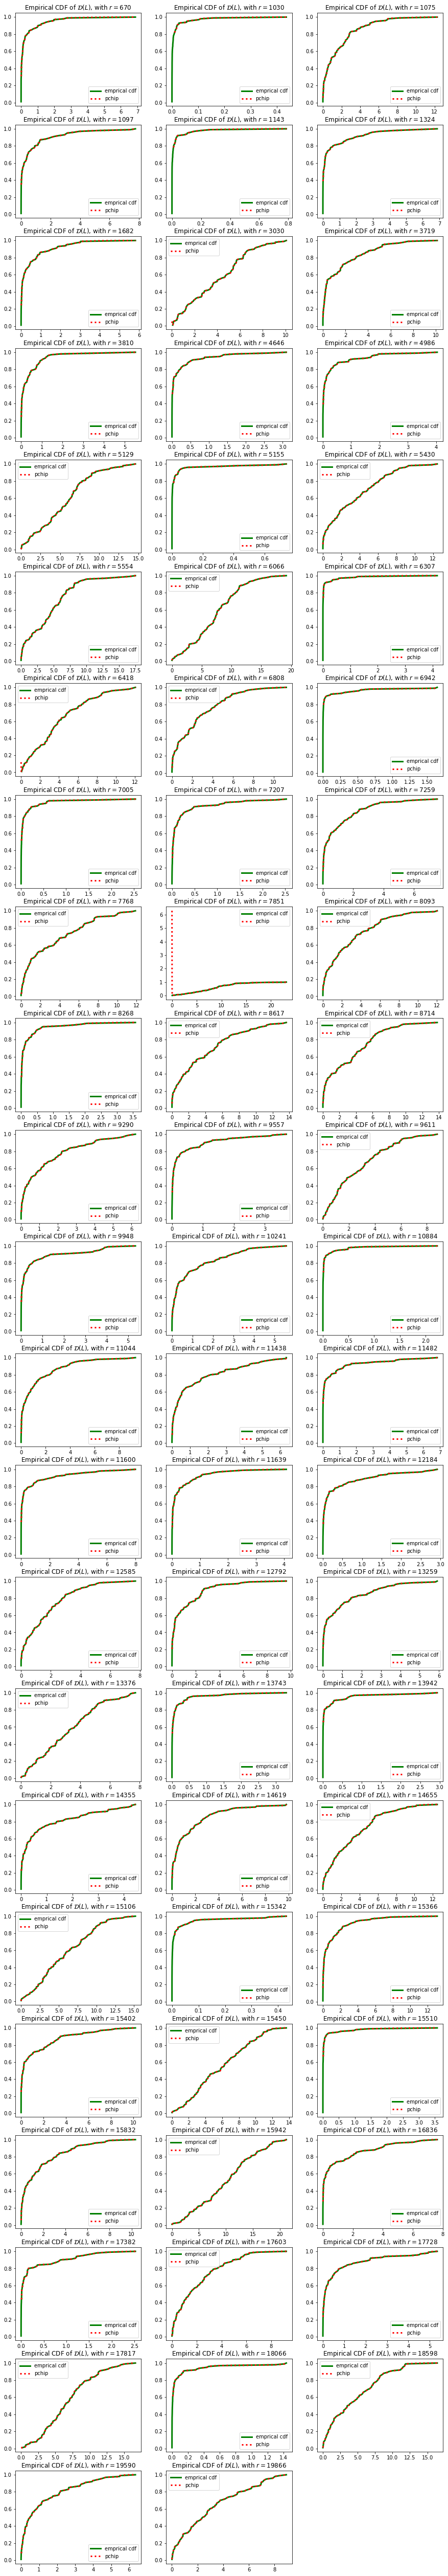

[  670  1030  1075  1097  1143  1324  1682  3030  3719  3810  4646  4986
  5129  5155  5430  5554  6066  6307  6418  6808  6942  7005  7207  7259
  7768  7851  8093  8268  8617  8714  9290  9557  9611  9948 10241 10884
 11044 11438 11482 11600 11639 12184 12585 12792 13259 13376 13743 13942
 14355 14619 14655 15106 15342 15366 15402 15450 15510 15832 15942 16836
 17382 17603 17728 17817 18066 18598 19590 19866]


In [0]:
used_target_records, pchip_references = mu.sample_reference_losses(target_records, reference_inferences)
print(used_target_records)

In [0]:
cut_off_p_value = 0.015
path = used_data.dataset_path + 'target_models/records_per_target_model.csv'
records_per_target_model = np.genfromtxt(path, delimiter=',', dtype='i')

p_values = mu.hypothesis_test(used_data, records_per_target_model, 
                              used_target_records, cut_off_p_value, pchip_references, 
                              target_inferences)

target_record:  670
fn:  47 tn:  45 fp:  5 tp:  3
precision:  0.375
recall:  0.06


target_record:  1030
fn:  45 tn:  48 fp:  2 tp:  5
precision:  0.7142857142857143
recall:  0.1


target_record:  1075
fn:  11 tn:  12 fp:  38 tp:  39
precision:  0.5064935064935064
recall:  0.78


target_record:  1097
fn:  50 tn:  49 fp:  1 tp:  0


target_record:  1143
fn:  49 tn:  49 fp:  1 tp:  1
precision:  0.5
recall:  0.02


target_record:  1324
fn:  50 tn:  48 fp:  2 tp:  0


target_record:  1682
fn:  10 tn:  6 fp:  44 tp:  40
precision:  0.47619047619047616
recall:  0.8


target_record:  3030
fn:  49 tn:  48 fp:  2 tp:  1
precision:  0.3333333333333333
recall:  0.02


target_record:  3719
fn:  45 tn:  43 fp:  7 tp:  5
precision:  0.4166666666666667
recall:  0.1


target_record:  3810
fn:  37 tn:  29 fp:  21 tp:  13
precision:  0.38235294117647056
recall:  0.26


target_record:  4646
fn:  50 tn:  50 fp:  0 tp:  0


target_record:  4986
fn:  43 tn:  34 fp:  16 tp:  7
precision:  0.3043478260869565